import random as rd

Variant = 23
rd.seed(Variant)

Numbers_of_problems = [i+1 for i in rd.sample(range(14),3)]
Numbers_of_problems

[13, 5, 2]


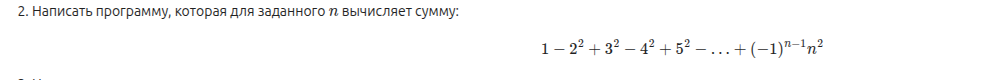

5. Написать программу, которая для заданного n позволяет определить, сколько целых чисел между 1 до n не делятся на 11 или на 5.
13. Найти все числа, не превосходящие заданного n и делящиеся на две своих последних цифры.

In [ ]:
; n - целое число, введенное пользователем
; Вычислить сумму 1 - 2^2 + 3^2 - ... + (-1)^(n-1) * n^2
format ELF64
public _start

section '.text' executable
_start:
    ; 1. Чтение n из stdin
    mov rax, 0
    mov rdi, 0
    mov rsi, input_buf
    mov rdx, 16
    syscall

    ; 2. Конвертация в число n
    mov rsi, input_buf
    call atoi
    mov [n_val], rax
    
    test rax, rax
    jz exit

    ; 3. Вычисление суммы 1 - 2^2 + 3^2 - ... + (-1)^(n-1) * n^2
    xor r12, r12        ; r12 = sum (Ответ)
    mov rbx, 1          ; rbx = i


loop_start:
    mov rax, rbx ; rax = rbx = i
    imul rax, rax       ; rax = i * i

    test rbx, 1         ; проверка на нечетность i (последний бит)
    jnz add_step        ; если i нечетное, добавляем к сумме
    sub r12, rax        ; если четное, вычитаем
    jmp next_iter 

add_step:
    add r12, rax        ; если нечетное, прибавляем

next_iter:
    inc rbx
    cmp rbx, [n_val]
    jle loop_start ; если i <= n, продолжаем цикл

    ; 4. Печать результата
    mov rax, r12
    call print_int

    ; Перенос строки
    mov rax, 1
    mov rdi, 1
    mov rsi, nl
    mov rdx, 1
    syscall 

exit:
    mov eax, 60
    xor edi, edi
    syscall

; -------------------------------- Функции ------------------ --------------
print_int:
    push rax  
    push rcx 
    push rdx
    push rdi
    push rsi

    ; Обработка отрицательного числа
    test rax, rax
    jns .prepare_convert

    push rax
    mov rax, 1          ; sys_write
    mov rdi, 1          ; stdout
    mov rsi, minus_char
    mov rdx, 1
    syscall
    pop rax
    neg rax             ; замена знака для деления
; Подготовка к конвертации числа в строку
.prepare_convert:
    mov rcx, 10
    mov rdi, print_buffer + 31
; Цикл конвертации числа в строку
.convert_loop:
    xor rdx, rdx 
    div rcx
    add dl, '0'
    mov [rdi], dl 
    dec rdi 
    test rax, rax
    jnz .convert_loop 

    inc rdi
    mov rsi, rdi
    mov rdx, print_buffer + 31
    sub rdx, rsi
    inc rdx

    mov rax, 1
    mov rdi, 1
    syscall

    pop rsi
    pop rdi
    pop rdx
    pop rcx
    pop rax
    ret

; Функция для конвертации строки в число
atoi:
    xor rax, rax            ; здесь будет результат
.loop:
    movzx rbx, byte [rsi]   ; берем символ
    test bl, bl             ; если конец строки (0), выходим
    jz .done
    cmp bl, '0'
    jb .done
    cmp bl, '9'
    ja .done
    sub bl, '0'             ; символ '5' превращаем в число 5
    imul rax, 10            ; умножаем текущий результат на 10
    add rax, rbx            ; добавляем новую цифру
    inc rsi                 ; следующий символ
    jmp .loop
.done:
    ret

;-------------------------------- ДАННЫЕ ------------------ --------------
section '.data' writeable
    n_val        dq 0
    input_buf    rb 16
    minus_char   db '-'
    nl           db 10  
    print_buffer rb 32

In [ ]:
;n - целое число, введенное пользователем
;Вывести количество чисел от 1 до n, которые не делятся на 5 и 11 одновременно

format ELF64
public _start

section '.text' executable
_start:
    ; 1. Чтение n из stdin
    mov rax, 0          ; sys_read
    mov rdi, 0          ; stdin
    mov rsi, input_buf
    mov rdx, 16
    syscall

    ; 2. Конвертация в число n
    mov rsi, input_buf
    call atoi
    mov [n_val], rax
    
    test rax, rax
    jz exit

    ; 3. Вычисления
    ; rbx — текущее число (i), r12 — счетчик подходящих чисел
    xor r12, r12
    mov rbx, 1

loop_start:
    ; Проверка деления на 11
    xor rdx, rdx
    mov rax, rbx
    mov rcx, 11
    div rcx
    test rdx, rdx       ; rdx — остаток
    jnz count_it        ; если остаток != 0, число НЕ делится на 11 (подходит)

    ; Проверка деления на 5
    xor rdx, rdx
    mov rax, rbx
    mov rcx, 5
    div rcx
    test rdx, rdx
    jnz count_it        ; если остаток != 0, число НЕ делится на 5 (подходит)

    jmp next_iter       ; делится на оба — НЕ считаем

count_it:
    inc r12

next_iter:
    inc rbx
    cmp rbx, [n_val]
    jle loop_start

    ; 4. Печать результата
    mov rax, r12
    call print_int

    ; Перенос строки
    mov rax, 1
    mov rdi, 1
    mov rsi, nl
    mov rdx, 1
    syscall

exit:
    mov eax, 60
    xor edi, edi
    syscall
    
; -------------------------------- Функции ------------------ --------------
print_int:
    push rax  
    push rcx 
    push rdx
    push rdi
    push rsi

    ; Обработка отрицательного числа
    test rax, rax
    jns .prepare_convert

    push rax
    mov rax, 1          ; sys_write
    mov rdi, 1          ; stdout
    mov rsi, minus_char
    mov rdx, 1
    syscall
    pop rax
    neg rax             ; замена знака для деления
; Подготовка к конвертации числа в строку
.prepare_convert:
    mov rcx, 10
    mov rdi, print_buffer + 31
; Цикл конвертации числа в строку
.convert_loop:
    xor rdx, rdx 
    div rcx
    add dl, '0'
    mov [rdi], dl 
    dec rdi 
    test rax, rax
    jnz .convert_loop 

    inc rdi
    mov rsi, rdi
    mov rdx, print_buffer + 31
    sub rdx, rsi
    inc rdx

    mov rax, 1
    mov rdi, 1
    syscall

    pop rsi
    pop rdi
    pop rdx
    pop rcx
    pop rax
    ret

; Функция для конвертации строки в число
atoi:
    xor rax, rax            ; здесь будет результат
.loop:
    movzx rbx, byte [rsi]   ; берем символ
    test bl, bl             ; если конец строки (0), выходим
    jz .done
    cmp bl, '0'
    jb .done
    cmp bl, '9'
    ja .done
    sub bl, '0'             ; символ '5' превращаем в число 5
    imul rax, 10            ; умножаем текущий результат на 10
    add rax, rbx            ; добавляем новую цифру
    inc rsi                 ; следующий символ
    jmp .loop
.done:
    ret

;-------------------------------- ДАННЫЕ ------------------ --------------
section '.data' writeable
    n_val        dq 0
    input_buf    rb 16
    minus_char   db '-'
    nl           db 10  
    print_buffer rb 32

In [ ]:
;n - целое число, введенное пользователем
;Вывести все числа от 1 до n, которые делятся на свои две последние цифры

format ELF64
public _start

section '.text' executable
_start:
    ; 1. Чтение n из stdin
    mov rax, 0
    mov rdi, 0
    mov rsi, input_buf
    mov rdx, 16
    syscall

    ; 2. Конвертация n
    mov rsi, input_buf
    call atoi
    mov [n_val], rax
    
    test rax, rax
    jz exit

    ; 3. Перебор чисел от 1 до n
    mov rbx, 1          ; rbx — текущее число (i)

main_loop:
    ; Получаем две последние цифры
    ; rax = i % 10 (последняя цифра)
    ; (i / 10) % 10 (предпоследняя цифра)
    
    mov rax, rbx
    xor rdx, rdx
    mov rcx, 10
    div rcx
    mov r13, rdx        ; r13 = последняя цифра (d2)
    
    xor rdx, rdx
    div rcx
    mov r14, rdx        ; r14 = предпоследняя цифра (d1)

    ; Проверка на 0 (на ноль делить нельзя)
    test r13, r13
    jz next_i
    test r14, r14
    jz next_i

    ; Проверка деления на d2 (последняя цифра)
    mov rax, rbx
    xor rdx, rdx
    div r13
    test rdx, rdx
    jnz next_i          ; если не делится, идем дальше

    ; Проверка деления на d1 (предпоследняя цифра)
    mov rax, rbx
    xor rdx, rdx
    div r14
    test rdx, rdx
    jnz next_i          ; если не делится, идем дальше

    ; Если прошли все проверки — печатаем число
    mov rax, rbx
    call print_int
    
    ; Печать пробела между числами
    mov rax, 1
    mov rdi, 1
    mov rsi, space_char
    mov rdx, 1
    syscall

next_i:
    inc rbx
    cmp rbx, [n_val]
    jle main_loop

    ; Печать переноса строки в конце
    mov rax, 1
    mov rdi, 1
    mov rsi, nl
    mov rdx, 1
    syscall

exit:
    mov eax, 60
    xor edi, edi
    syscall

; -------------------------------- Функции ------------------ --------------
print_int:
    push rax  
    push rcx 
    push rdx
    push rdi
    push rsi

    ; Обработка отрицательного числа
    test rax, rax
    jns .prepare_convert

    push rax
    mov rax, 1          ; sys_write
    mov rdi, 1          ; stdout
    mov rsi, minus_char
    mov rdx, 1
    syscall
    pop rax
    neg rax             ; замена знака для деления
; Подготовка к конвертации числа в строку
.prepare_convert:
    mov rcx, 10
    mov rdi, print_buffer + 31
; Цикл конвертации числа в строку
.convert_loop:
    xor rdx, rdx 
    div rcx
    add dl, '0'
    mov [rdi], dl 
    dec rdi 
    test rax, rax
    jnz .convert_loop 

    inc rdi
    mov rsi, rdi
    mov rdx, print_buffer + 31
    sub rdx, rsi
    inc rdx

    mov rax, 1
    mov rdi, 1
    syscall

    pop rsi
    pop rdi
    pop rdx
    pop rcx
    pop rax
    ret

; Функция для конвертации строки в число
atoi:
    xor rax, rax            ; здесь будет результат
.loop:
    movzx rbx, byte [rsi]   ; берем символ
    test bl, bl             ; если конец строки (0), выходим
    jz .done
    cmp bl, '0'
    jb .done
    cmp bl, '9'
    ja .done
    sub bl, '0'             ; символ '5' превращаем в число 5
    imul rax, 10            ; умножаем текущий результат на 10
    add rax, rbx            ; добавляем новую цифру
    inc rsi                 ; следующий символ
    jmp .loop
.done:
    ret

;-------------------------------- ДАННЫЕ ------------------ --------------
section '.data' writeable
    n_val        dq 0
    input_buf    rb 16
    minus_char   db '-'
    space_char   db ' '
    nl           db 10  
    print_buffer rb 32

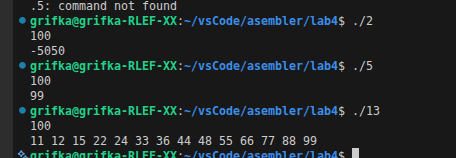